Compute blue score given ground truth sequence along with predicted sequence

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from nltk.translate.bleu_score import sentence_bleu
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


In [16]:
predictions = pd.read_csv("texnet_predictions.csv")


In [284]:
predictions

,eval_image_name,target_seq,pred_seq,score_pred,score_gold,bleu2,length
0,0,\phi ( g ) = \lambda ( g ) \xi,\phi ( g ) = \lambda ( g ) \xi,1.000000,0,1.000000,10
1,12119,a _ { m 1 1 2 } = 0 .,a _ { m 1 1 2 } = 0 .,1.000000,0,1.000000,11
2,6769,v = x \left( \frac { N + 2 } { N } \right),v = x \left( \frac { N + 2 } { N } \right),1.000000,0,1.000000,14
3,6770,"\phi _ { j } ( \theta , \phi ) = g _ { j } ( \...","\phi _ { j } ( \theta , \phi ) = g _ { j } ( \...",1.000000,0,1.000000,27
4,12117,\hat { n } _ { \alpha \beta },\hat { n } _ { \alpha \beta },1.000000,0,1.000000,9
...,...,...,...,...,...,...,...
16515,12372,"\frac 1 2 , \frac 1 2 , \frac 1 2","\frac { 1 } { 2 } , \frac { 1 } { 2 } , \frac ...",0.208514,0,0.208514,11
16516,15630,\tau ^ { \mathbf { \hat { a } } },{ { \mathrm { \boldmath { \tau } } } ^ { { \bf...,0.251312,0,0.251312,11
16517,3860,"\left\langle \cdot , \cdot \right\rangle","{ \langle { \cdot , \cdot } \rangle }",0.288675,0,0.288675,5
16518,3218,| 0 _ { \mathrm { i n } } \rangle,{ \mathrm { { | } } { { { \mathrm { { 0 } } _ ...,0.243975,0,0.243975,11


In [154]:
split = lambda s:  s.split()
bleu_string = lambda truth, candidatate: sentence_bleu([split(truth)], split(candidatate), weights=(.50,.50,0,0))

In [173]:
predictions["score_pred"] = predictions.apply(lambda r: bleu_string(r["target_seq"], r["pred_seq"]), axis=1)


In [341]:
predictions["length"] = predictions.target_seq.apply(split).apply(len)

In [424]:
hist = predictions.hist(bins=50, column=["length"])
plt.hist(predictions)

TypeError: '<=' not supported between instances of 'int' and 'str'

https://mode.com/example-gallery/python_histogram/
for the qualitative plots
https://stackoverflow.com/questions/6871201/plot-two-histograms-on-single-chart-with-matplotlib


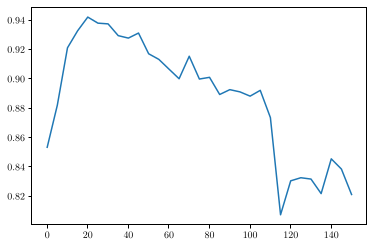

In [415]:
score_by_len = predictions[["length","score_pred"]]
score_by_len["length"] = score_by_len["length"] // 5 * 5
splot = score_by_len.groupby("length").agg("mean")
plt.plot(splot)
plt.savefig('assets/scorebylen.pdf')

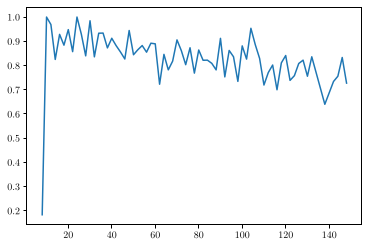

In [416]:
p = predictions[["target_seq","length","score_pred"]]
p["length"] = p["length"] // 2 * 2
has = lambda x: p["target_seq"].str.contains(x)
stacked = p[has("array") | has("cases") | has("matrix") | has("binom")]
splot = stacked.groupby("length").agg("mean")
stacked["score_pred"].mean()
plt.plot(splot)
plt.savefig('assets/scorebylenstacked.pdf')

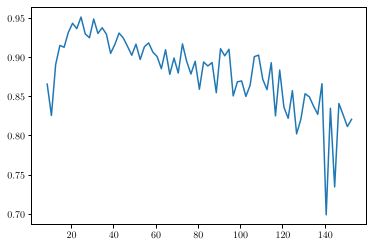

In [405]:
stacked = p[has("frac") | has("over")]
stacked = stacked[["length","score_pred"]]
splot = stacked.groupby("length").agg("mean")
stacked["score_pred"].mean()
plt.plot(splot)
plt.savefig('assets/example.pdf')
